# code needed for development, to be removed in release version

In [1]:
# delete ...temporary fix in arcos env to remove old isf
import sys, os
sys.path = ['/gpfs/soma_fs/scratch/abast/anaconda3_isf/lib/python38.zip',
             '/gpfs/soma_fs/scratch/abast/anaconda3_isf/lib/python3.8',
             '/gpfs/soma_fs/scratch/abast/anaconda3_isf/lib/python3.8/lib-dynload',
             '/gpfs/soma_fs/scratch/abast/anaconda3_isf/lib/python3.8/site-packages',]
del os.environ["ISF_DISTRIBUTED_LOCK_CONFIG"]

# Release version below

In [2]:
# Note: This notebook needs to run in an in_silico_framework environment. 
#
# Detailed installation instructions can be found here: 
# https://github.com/mpinb/in_silico_framework_hot_zone

In [3]:
# ensure the in_silico_framework_hot_zone repository is on your PYTHONPATH
import sys
BASEDIR = '/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/'
sys.path.insert(0, BASEDIR)

In [4]:
# After successful installation, you can import Interface
import Interface as I

[INFO] ISF: Current version: heads/master+0.g45fb734f.dirty
[INFO] ISF: Current pid: 249019
[INFO] ISF: Loading mechanisms:
[WARNING] cell_morphology_visualizer: No module named 'dash'
[ATTENTION] ISF: The source folder has uncommited changes!



[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: heads/master+0.g45fb734f.dirty, PIL: 10.4.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, _pytest: 6.1.1, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cupy: 10.3.1, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, defusedxml: 0.6.0, distributed: 2.30.1, distutils: 3.8.5, fastrlock: 0.8.2, fsspec: 0.8.3, future: 0.18.2, ipykernel: 5.3.4, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, isf_pandas_msgpack: 0.4.0, jedi: 0.17.1, jinja2: 2.11.2, joblib:

# set up paths to data

In [5]:
# All parameters are located within the publication_data folder of 
# the in_silico_framework_hot_zone repository. The folder can be accessed as isf_db.
db = I.DataBase(I.os.path.join(BASEDIR, 'publication_data'))
db

Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data
publication_data
├── model_parameters
├── biophysical_models
├── morphologies
├── network_embedding
├── example_simulation
├── functional_data
└── synaptic_strengths

In [6]:
print(f'The database has the ID {db.get_id()}') 

The database has the ID 2025-06-04_154293_h3rTCgQ


In [7]:
# Register database such that paths can be resolved
db._register_this_database()

[ATTENTION] distributed_lock: Environment variable ISF_DISTRIBUTED_LOCK_CONFIG is not set. Falling back to default configuration.
[WARNING] distributed_lock: Using file based locking. Please be careful on nfs mounts as file based locking has issues in this case.


In [8]:
NETWORK_EMBEDDING_PATH = db['network_embedding']
MORPHOLOGY_PATH = db['morphologies']
CONDITIONS_PATH = db['model_parameters'].join('list_of_models_consistent_with_in_vivo_ranges.csv')
SYN_STRENGTHS_PATH = db['synaptic_strengths'].join('list_of_synaptic_strengths.json')
PSTHs_PATH = db['functional_data'].join('PSTHs.json')
MORPHOLOGY_BY_MODELID_PATH = db['morphologies'].join('morpholgy_by_modelid.json')

# Reproducing "Thalamus enables active dendritic coupling of inputs arriving at different cortical layers"

## Demo

Let's run a demo to reproduces the example simulation trial shown in Fig 4a and Fig. 6a

In [9]:
# example data
example_trial = 'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380'
example_dir = db['example_simulation'][example_trial]
example_dir

Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
├── example_network_model.param
├── synapse_activation.csv
└── example_neuron_model.param

In [21]:
#neuron_parameters = I.scp.build_parameters(example_dir.join('example_neuron_model.param'))
#network_parameters = I.scp.build_parameters(example_dir.join('example_network_model.param'))
neuron_parameters = I.scp.build_parameters(example_dir.join('example_neuron_model.param'))
network_parameters = I.scp.build_parameters(example_dir.join('example_network_model.param'))
synapse_activation = I.csv_synapse_activation_to_pandas(example_dir.join('synapse_activation.csv'))

In [135]:
# run simulation
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation)
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [117]:
neuron_parameters.sim.recordingSites = ['mdb://2025-06-04_154293_h3rTCgQ/morphologies/WR64_Cell8.landmarkAscii']

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

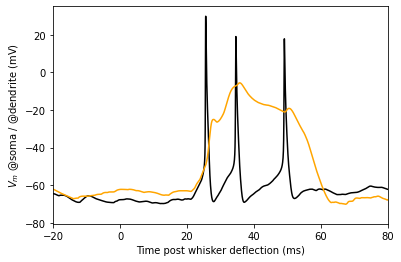

In [137]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

In [156]:
I.sca.simple_spike_detection(t, v_soma)

[470.499999999709, 479.49999999970083, 493.99999999968765]

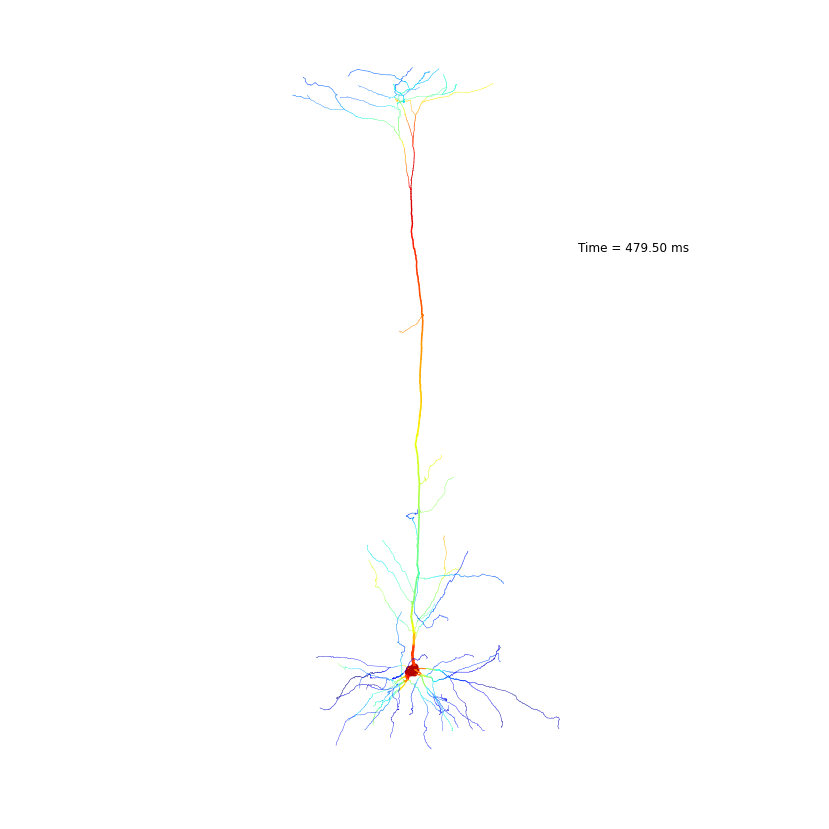

In [154]:
# visualize at timepoint of second somatic AP
from visualize.cell_morphology_visualizer import CellMorphologyVisualizer
cmv = CellMorphologyVisualizer(cell, t_step = 0.5)
cmv.camera_position = {'azim': 270, 'dist': 10, 'elev': -5, 'roll': 0}
cmv.plot(color = 'vm', time_point = 479.5)
I.plt.show()

### Manipulations

In [22]:
def remove_CELLTYPE_in_interval(sa, CELLTYPE = None, tmin = None, tmax = None):
    sa = sa.copy()
    celltype = sa.synapse_type.str.split('_').str[0]
    sa[celltype == CELLTYPE] = sa[celltype == CELLTYPE].apply(lambda x: I.pd.Series({name: I.np.nan if (I.utils.convertible_to_int(name) and (tmin <= value <= tmax)) else value for name, value in x.iteritems()}).dropna(), axis = 1)
    return sa

### no IC evoked activity

In [23]:
def remove_intracortical_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L2', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L34', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4py', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4sp', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4ss', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5st', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5tt', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6cc', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ccinv', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ct', tmin = 445+19, tmax = 445+900)
    return sa

In [32]:
# remove sensory-evoked IC input, leaving only direct TC
synapse_activation_wo_IC = remove_intracortical_in_interval(synapse_activation)

[WARNING] <ipython-input-22-2cee019b4f92>: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [33]:
# resimulate w/o sensory-evoked IC input
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_IC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [34]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

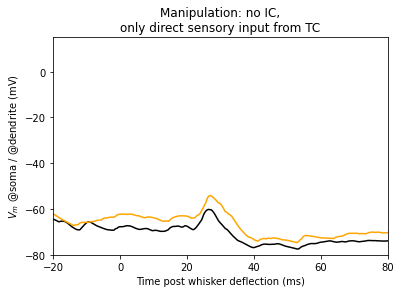

In [37]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 15)
I.plt.title('Manipulation: no IC,\nonly direct sensory input from TC')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

### no TC evoked activity

In [38]:
def remove_TC_in_interval(sa):
    return remove_CELLTYPE_in_interval(sa, 'VPM', tmin = 445+19, tmax = 445+900)

In [39]:
# remove sensory-evoked TC input
synapse_activation_wo_TC = remove_TC_in_interval(synapse_activation)

In [40]:
# resimulate w/o sensory-evoked TC input
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_TC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [41]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

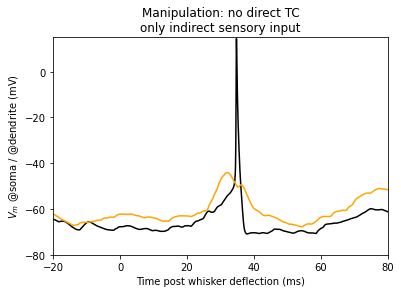

In [42]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 15)
I.plt.title('Manipulation: no direct TC,\nonly indirect sensory input')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

### passive apical dendrite

In [ ]:
def inactivate_channel(neuron_param, label, channel):
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] # make sure it is there
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] = 0.
        
def create_modified_neuron_param(neuron_param, manipulation = None):
    if manipulation == 'NoActiveDendrite':
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_HVA')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_LVAst')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'NaTa_t')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SK_E2')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Im')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SKv3_1')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ih')
    else:
        raise ValueError()
    return neuron_param

def remove_apical_active_conductances(neuron_param):
    return create_modified_neuron_param(neuron_param, 'NoActiveDendrite')

In [ ]:
neuron_parameters_passive_apical = remove_apical_active_conductances(neuron_parameters)

In [ ]:
# resimulate with passive apical dendrite
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_TC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


### Code to set up demo files

In [15]:
# The trial had the following sim_trial_index
neuron_parameter_example = db['biophysical_models']['WR64_Cell8'].join('39.param')
network_parameter_example = db['biophysical_models']['WR64_Cell8'].join('39.param')

In [18]:
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/results/20221030_hot_zone_on_interactive+big_simulations_many_morphologies_redo/')
m = mdb['mdbs']['run_200_trials_on_in_distributions_conditions_with_bursts/WR64_Cell8']

In [20]:
sti = 'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380/000066'
neup, netp = I.load_param_files_from_mdb(m, sti)

In [87]:
for k,v in netp.network.items():
    v.synapses.connectionFile = 'mdb://2025-06-04_154293_h3rTCgQ/network_embedding/WR64_Cell8/D3border/con.con'
    v.synapses.distributionFile = 'mdb://2025-06-04_154293_h3rTCgQ/network_embedding/WR64_Cell8/D3border/con.syn'

In [88]:
netp.save('/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380/example_network_model.param')

In [6]:
# we provide example data for convenience
example_data_dir = db['example_simulation']['D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380']
example_data_dir

Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
└── synapse_activation.csv

In [131]:
# load neuron parameters, specifying multicompartmental model
neup = db['biophysical_models'].join('WR64_Cell8').join('39.param')
neup = I.scp.build_parameters(neup)
neup.neuron.filename = 'mdb://2025-06-04_154293_h3rTCgQ/morphologies/WR64_Cell8.hoc'
neup.sim.recordingSites = ['mdb://2025-06-04_154293_h3rTCgQ/morphologies/WR64_Cell8.landmarkAscii']

In [132]:
neup.save('/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380/example_neuron_model.param')

In [ ]:
neuron_parameters.sim.recordingSites = ['mdb://2025-06-04_154293_h3rTCgQ/morphologies/WR64_Cell8.landmarkAscii']

In [7]:
# load network parameters, specifying network embedding


Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
└── synapse_activation.csv

In [26]:
!cp {example_data_dir.join('synapse_activation')} {example_data_dir.join('synapse_activation')}.csv

In [12]:
sim_trial_index = 'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380/000066'

# Load simulation parameters clean

In [53]:
BASEDIR = '/gpfs/soma_fs/scratch/fruengel/modldb_repo' # change this to your local modeldb repo path
ISF_PATH = BASEDIR + '/in_silico_framework'
NETWORK_EMBEDDING_PATH = BASEDIR + '/network_embedding'
MORPHOLOGY_PATH = BASEDIR + '/morphology'
CONDITIONS_PATH = BASEDIR + '/list_of_models_consistent_with_in_vivo_ranges.csv'
SYN_STRENGTHS_PATH = BASEDIR + '/list_of_synaptic_strengths.json'
PSTHs_PATH = BASEDIR + '/PSTHs.json'
MORPHOLOGY_BY_MODELID_PATH = os.path.join(BASEDIR, 'morpholgy_by_modelid.json')

In [10]:
db

Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data
publication_data
├── model_parameters
├── biophysical_models
├── morphologies
├── network_embedding
├── example_simulation
├── functional_data
└── synaptic_strengths

In [54]:
# put in_silico_framework on PATH
if not ISF_PATH in sys.path:
    sys.path.append(ISF_PATH)

In [55]:
# get functions
import json

def get_network_embedding(morphology, position):
    outdir = NETWORK_EMBEDDING_PATH + f'/{morphology}/{embedding}'
    synpath = outdir + '/con.syn'
    conpath = outdir + '/con.con'
    assert os.path.exists(synpath)
    assert os.path.exists(conpath)
    return synpath, conpath

def get_morphology_and_landmarks(morphology):
    hocpath = MORPHOLOGY_PATH + f'/{morphology}.hoc'
    landmarkpath = MORPHOLOGY_PATH + f'/{morphology}.landmarkAscii'
    assert os.path.exists(hocpath)
    assert os.path.exists(landmarkpath)
    return hocpath, landmarkpath 

def get_conditions():
    with open(CONDITIONS_PATH) as f:
        content = f.read()
    content = content.split('\n')[1:]
    content = [c.split(',') for c in content]
    return content

def get_synaptic_strengths():
    with open(SYN_STRENGTHS_PATH) as f:
        return json.load(f)
    
def get_PSTHs():
    with open(PSTHs_PATH) as f:
        out = json.load(f)
    return {k:(np.array(v[0]), np.array(v[1])) for k,v in out.items()} # times and rates should be numpy

def get_morphology_by_modelid():
    with open(MORPHOLOGY_BY_MODELID_PATH) as f:
        return json.load(f)
    
# TBD get biophysical parameters

# Load simulation parameters setup, delete in final version

In [13]:
# delete for final version
I.os.makedirs('/gpfs/soma_fs/scratch/fruengel/modldb_repo')

In [14]:
# BASEDIR = /path/to/model_db/folder # final version
BASEDIR = '/gpfs/soma_fs/scratch/fruengel/modldb_repo'

In [ ]:
# put in_silico_framework on PATH
import sys, os
sys.path.append(os.path.join(BASEDIR, 'in_silico_framework')) # final version

In [65]:
# network_embedding
NETWORK_EMBEDDING_PATH = os.path.join(BASEDIR, 'network_embedding')
###### delete for final version #####
anatomical_model_mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/backup_axon_scratch_20211217/results/20200130_network_embedding_for_hot_zone_simulations/', readonly = True)
import shutil
os.makedirs(NETWORK_EMBEDDING_PATH, exist_ok = True)
for morph in ['WR64_Cell8', 'WR69_Cell2', 'WR71_Cell6']:
    for embedding in ['B1border', 'B2border', 'B3border', 'C1border', 'C2center', 'D1border', 'D2border', 'D3border']:
        d = anatomical_model_mdb[morph][f'{embedding}_VPMmike_INHuniform_5000']
        syn = d.get_file('.syn')
        con = d.get_file('.con')
        outdir = NETWORK_EMBEDDING_PATH + f'/{morph}/{embedding}'
        os.makedirs(outdir, exist_ok = True)
        shutil.copy(syn, outdir)
        shutil.copy(con, outdir)
###### end delete for final version #####
def get_network_embedding(morphology, position):
    outdir = NETWORK_EMBEDDING_PATH + f'/{morph}/{embedding}'
    synpath = outdir + '/con.syn'
    conpath = outdir + '/con.con'
    assert os.path.exists(synpath)
    assert os.path.exists(conpath)
    return syn, con

In [66]:
# morphology
MORPHOLOGY_PATH = os.path.join(BASEDIR, 'morphology')
###### delete for final version #####
os.makedirs(MORPHOLOGY_PATH, exist_ok=True)
# this copies morphologies and landmark files
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/results/20221030_hot_zone_on_interactive+big_simulations_many_morphologies_redo/')
morphology_path = mdb['morphologies']
for fpath in morphology_path.listdir():
    morph = fpath[:10]
    extension = fpath.split('.')[-1]
    inpath = morphology_path.join(fpath)
    outpath = MORPHOLOGY_PATH + f'/{morph}.{extension}'
    print(inpath)
    print(outpath)
    shutil.copy(inpath, outpath)
###### end delete for final version #####
def get_morphology_and_landmarks(morphology):
    hocpath = MORPHOLOGY_PATH + f'/{morphology}.hoc'
    landmarkpath = MORPHOLOGY_PATH + f'/{morphology}.landmarkAscii'
    assert os.path.exists(hocpath)
    assert os.path.exists(landmarkpath)
    return hocpath, landmarkpath 

/gpfs/soma_fs/scratch/abast/results/20221030_hot_zone_on_interactive+big_simulations_many_morphologies_redo/morphologies_rsblqfto_/WR71_Cell6_L5TT_C2-registered.hocwith_radius_constant_mean_Soma.landmarkAscii
/gpfs/soma_fs/scratch/fruengel/modldb_repo/morphology/WR71_Cell6.landmarkAscii
/gpfs/soma_fs/scratch/abast/results/20221030_hot_zone_on_interactive+big_simulations_many_morphologies_redo/morphologies_rsblqfto_/WR69_Cell2_L5TT.landmarkAscii
/gpfs/soma_fs/scratch/fruengel/modldb_repo/morphology/WR69_Cell2.landmarkAscii
/gpfs/soma_fs/scratch/abast/results/20221030_hot_zone_on_interactive+big_simulations_many_morphologies_redo/morphologies_rsblqfto_/WR69_Cell2_L5TT.hoc
/gpfs/soma_fs/scratch/fruengel/modldb_repo/morphology/WR69_Cell2.hoc
/gpfs/soma_fs/scratch/abast/results/20221030_hot_zone_on_interactive+big_simulations_many_morphologies_redo/morphologies_rsblqfto_/WR64_Cell8_L5TT_C2-registered.hocwith_radius_constant_mean.landmarkAscii
/gpfs/soma_fs/scratch/fruengel/modldb_repo/morph

In [83]:
# list of models consistent with in vivo ranges
CONDITIONS_PATH = os.path.join(BASEDIR, 'list_of_models_consistent_with_in_vivo_ranges.csv')
# ###### delete for final version #####
## code to select conditions with acceptable ongoing spike rates and sensory-evoked responses (not provided)
# out = []
# for k in onset_composition:
#     if not k[0] == 'control':
#         continue
#     if onset_composition[k]['doublet'] <= 0.40:
#             if onset_composition[k]['triplet'] < 0.13:
#                 if 0 < onset_composition[k]['triplet'] + onset_composition[k]['doublet']:
#                     if onset_composition[k]['doublet'] + onset_composition[k]['triplet'] + onset_composition[k]['singlet'] > 0:
#                         out.append(k)   
# list_of_conditions = out
# 
# with open(CONDITIONS_PATH, 'w') as f:
#     f.write('#morphology, embedding, biophyiscal_model_id, ongoing_inhibition_scaling, stimulus, inhibitory_timeshift, evoked_inhibition_scaling\n')
#     for c in list_of_conditions:
#         f.write(','.join(c[1:]) + '\n')
# ###### end delete for final version #####

def get_conditions():
    with open(CONDITIONS_PATH) as f:
        content = f.read()
    content = content.split('\n')[1:]
    content = [c.split(',') for c in content]
    return content

In [90]:
# synaptic strengths
SYN_STRENGTHS_PATH = os.path.join(BASEDIR, 'list_of_synaptic_strengths.json')
# ###### delete for final version #####
syn_strength_dict_all_synapses = mdb['syn_strength_dict']
with open(SYN_STRENGTHS_PATH, 'w') as f:
    json.dump(syn_strength_dict_all_synapses, f)
# ###### end delete for final version #####
import json
def get_synaptic_strengths():
    with open(SYN_STRENGTHS_PATH) as f:
        return json.load(f)

In [104]:
PSTHs_PATH = os.path.join(BASEDIR, 'PSTHs.json')
# ###### delete for final version #####
import json
PSTHs_1ms = {'VPM': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([0.00136986, 0.        , 0.01428571, 0.03809524, 0.05714286,
       0.07619048, 0.10952381, 0.11428571, 0.07142857, 0.05238095,
       0.03809524, 0.05238095, 0.03333333, 0.04761905, 0.02857143,
       0.01428571, 0.03809524, 0.01428571, 0.01904762, 0.0152381 ,
       0.00857143, 0.01428571, 0.01119048, 0.00785714, 0.00761905,
       0.0052381 , 0.0097619 , 0.00880952, 0.00833333, 0.0097619 ,
       0.01      , 0.00738095, 0.00714286, 0.00880952, 0.00928571,
       0.00833333, 0.00809524, 0.00785714, 0.00880952, 0.00952381,
       0.0102381 , 0.01047619, 0.01095238, 0.01119048, 0.0097619 ,
       0.01214286, 0.0097619 , 0.0102381 , 0.01309524, 0.01119048,
       0.01285714, 0.01095238, 0.00928571, 0.01357143, 0.00904762,
       0.005     , 0.00047619, 0.        , 0.        , 0.        ,
       0.        , 0.0002381 , 0.        , 0.00047619])], 'L6CC': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([5.36223091e-04, 0.00000000e+00, 3.57142857e-03, 0.00000000e+00,
       0.00000000e+00, 1.43803217e-01, 0.00000000e+00, 1.35484292e-01,
       3.61791668e-02, 9.28984032e-02, 5.42072128e-02, 1.23269301e-01,
       8.51669329e-02, 4.22619048e-02, 3.11120309e-02, 3.33333333e-02,
       2.35119048e-02, 6.90085870e-03, 3.04635762e-03, 9.52380952e-04,
       9.52380952e-04, 1.66666667e-03, 5.23809524e-03, 1.27878610e-03,
       2.24019321e-03, 2.65937508e-03, 3.91068681e-03, 1.52954413e-03,
       1.88375958e-03, 1.17240127e-03, 9.45550351e-04, 1.23428046e-03,
       1.47833724e-03, 1.81299145e-03, 1.87072349e-03, 2.05842781e-03,
       2.50448308e-03, 1.29047309e-03, 2.49361206e-03, 2.29473128e-03,
       1.03836596e-03, 1.47197192e-03, 1.93095653e-03, 8.08694379e-04,
       1.00204002e-03, 1.43092681e-03, 1.03907519e-03, 2.09404452e-03,
       3.98858314e-04, 1.40746237e-03, 1.41968249e-03, 1.41271468e-03,
       1.53401094e-03, 1.45281446e-03, 1.74803924e-03, 1.37965206e-03,
       2.91471507e-03, 7.21520095e-04, 5.41972866e-04, 4.04446547e-04,
       3.63401437e-04, 2.95667447e-04, 1.05851699e-04, 3.98591746e-04])], 'L4ss': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([0.00115747, 0.        , 0.        , 0.00333333, 0.        ,
       0.        , 0.        , 0.        , 0.01591204, 0.02913043,
       0.02304348, 0.02289855, 0.03434783, 0.01144928, 0.00333333,
       0.        , 0.        , 0.00333333, 0.004     , 0.00066667,
       0.00266667, 0.00266667, 0.00371366, 0.00253516, 0.00300575,
       0.00341548, 0.00175287, 0.00346428, 0.00203516, 0.00358621,
       0.00266667, 0.00150575, 0.00235666, 0.00169608, 0.00151758,
       0.00151758, 0.00211562, 0.00191954, 0.00243137, 0.00352941,
       0.00266667, 0.00325287, 0.00208621, 0.0025    , 0.00216667,
       0.00250575, 0.00310379, 0.00216667, 0.00142529, 0.00283717,
       0.003     , 0.00211562, 0.00318808, 0.002     , 0.002     ,
       0.002     , 0.00176471, 0.00133333, 0.00083333, 0.00026471,
       0.00076471, 0.00057246, 0.0004058 , 0.00023913])], 'L5TT': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([0.00216226, 0.00108108, 0.00327485, 0.00354305, 0.0003252 ,
       0.00164446, 0.00167449, 0.00472394, 0.01466667, 0.03728979,
       0.06148892, 0.05762219, 0.04373781, 0.05666401, 0.03082494,
       0.01853883, 0.00464242, 0.00581315, 0.00272998, 0.00654799,
       0.00861074, 0.00352475, 0.00399876, 0.00657295, 0.01123286,
       0.00904555, 0.00562618, 0.0053193 , 0.00603566, 0.00728842,
       0.00525555, 0.00680474, 0.00539578, 0.00630508, 0.00682545,
       0.00645775, 0.00637406, 0.00508756, 0.0066391 , 0.00725979,
       0.00506127, 0.00617644, 0.00632364, 0.00627671, 0.00558887,
       0.00534255, 0.006778  , 0.00538644, 0.00531972, 0.00667693,
       0.00535597, 0.00602466, 0.00576317, 0.00641854, 0.00540016,
       0.00646505, 0.00459043, 0.00266334, 0.00202163, 0.00160612,
       0.00109666, 0.00231178, 0.00155425, 0.00130906])], 'INT': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([0.00251095, 0.00449696, 0.00409495, 0.00151515, 0.00419488,
       0.04128788, 0.01878341, 0.09288905, 0.20087337, 0.15959459,
       0.1272792 , 0.09521312, 0.09720255, 0.07850266, 0.04762997,
       0.02874596, 0.02528052, 0.00732227, 0.00388839, 0.00143882,
       0.00271377, 0.00332994, 0.00354427, 0.00924889, 0.0100747 ,
       0.00985577, 0.00978178, 0.00871505, 0.00771226, 0.00659895,
       0.00811807, 0.0066922 , 0.00661976, 0.00666228, 0.0067164 ,
       0.00694274, 0.00716889, 0.00693228, 0.00619805, 0.0048379 ,
       0.00547238, 0.0062619 , 0.00647745, 0.00641854, 0.00674207,
       0.00642165, 0.00673333, 0.00666788, 0.00586395, 0.00652652,
       0.00684776, 0.00643377, 0.00596619, 0.00576195, 0.00620149,
       0.00718102, 0.00332066, 0.00175557, 0.00137219, 0.00065039,
       0.00054234, 0.00139958, 0.00094145, 0.0012355 ])], 'L23': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([0.00053272, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00416667, 0.00833333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00416667, 0.        , 0.00083333, 0.        , 0.        ,
       0.        , 0.        , 0.00083333, 0.00125   , 0.00104167,
       0.00104167, 0.000625  , 0.00166667, 0.00125   , 0.00125   ,
       0.00208333, 0.00020833, 0.00125   , 0.00104167, 0.00104167,
       0.00125   , 0.000625  , 0.00020833, 0.00125   , 0.000625  ,
       0.00041667, 0.00083333, 0.00020833, 0.00041667, 0.000625  ,
       0.000625  , 0.00083333, 0.00083333, 0.        , 0.00104167,
       0.00083333, 0.00041667, 0.00020833, 0.00083333, 0.00166667,
       0.00083333, 0.00125   , 0.000625  , 0.00104167, 0.00020833,
       0.        , 0.        , 0.        , 0.        ])], 'L5ST': [I.np.array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
         29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
         60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
        280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
        500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900]), I.np.array([0.00130593, 0.        , 0.        , 0.0037037 , 0.        ,
       0.00389157, 0.00851852, 0.        , 0.        , 0.01111111,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0037037 , 0.        , 0.00061728, 0.00061728,
       0.00016103, 0.00185185, 0.00042002, 0.00085225, 0.00189882,
       0.00218062, 0.0022759 , 0.00325966, 0.00220397, 0.00205582,
       0.00222564, 0.0015679 , 0.00174114, 0.00256173, 0.0019323 ,
       0.00095679, 0.00082736, 0.001843  , 0.00131508, 0.0022814 ,
       0.0021672 , 0.001917  , 0.00192297, 0.00188003, 0.00075013,
       0.00208991, 0.00277851, 0.00232146, 0.00203106, 0.00173779,
       0.0009696 , 0.00079093, 0.00163312, 0.0010781 , 0.0021766 ,
       0.00233682, 0.00176865, 0.00194786, 0.00207816, 0.00092593,
       0.00096618, 0.0007037 , 0.00067901, 0.0008642 ])]}
for celltype in PSTHs_1ms:
    a,b = PSTHs_1ms[celltype]
    PSTHs_1ms[celltype] = (a,b*1000)
a,b = deepcopy(PSTHs_1ms['VPM'])
PSTHs_1ms['inactive'] = (a,I.np.zeros_like(b))
PSTHs_serializable = {k:(v[0].tolist(),v[1].tolist()) for k,v in PSTHs_1ms.items()}
with open(PSTHs_PATH, 'w') as f:
    json.dump(PSTHs_serializable, f)
# ###### end delete for final version #####
import numpy as np
def get_PSTHs():
    with open(PSTHs_PATH) as f:
        out = json.load(f)
    return {k:(np.array(v[0]), np.array(v[1])) for k,v in out.items()} # times and rates should be numpy
get_PSTHs()

{'VPM': (array([-200,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
           29,   30,   31,   32,   33,   34,   35,   40,   45,   50,   55,
           60,   80,  100,  120,  140,  160,  180,  200,  220,  240,  260,
          280,  300,  320,  340,  360,  380,  400,  420,  440,  460,  480,
          500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
          720,  740,  760,  780,  800,  820,  840,  860,  880,  900]),
  array([  1.36986,   0.     ,  14.28571,  38.09524,  57.14286,  76.19048,
         109.52381, 114.28571,  71.42857,  52.38095,  38.09524,  52.38095,
          33.33333,  47.61905,  28.57143,  14.28571,  38.09524,  14.28571,
          19.04762,  15.2381 ,   8.57143,  14.28571,  11.19048,   7.85714,
           7.61905,   5.2381 ,   9.7619 ,   8.80952,   8.33333,   9.7619 ,
          10.     ,   7.38095,   7.14286,   8.80952,   9.28571,   8.33333,
           8.09524,   7.85714,   8.80952,   9.52381,  10.2381 ,  10.47619,
          10.95238,  1

In [10]:
# morphology by modelid
morphology_by_modelid = {13: 'WR64_Cell8',
 17: 'WR64_Cell8',
 36: 'WR64_Cell8',
 19: 'WR64_Cell8',
 41: 'WR71_Cell6',
 49: 'WR71_Cell6',
 37: 'WR64_Cell8',
 53: 'WR71_Cell6',
 61: 'WR69_Cell2',
 10: 'WR64_Cell8',
 55: 'WR71_Cell6',
 27: 'WR64_Cell8',
 65: 'WR69_Cell2',
 62: 'WR69_Cell2',
 5: 'WR64_Cell8',
 18: 'WR64_Cell8',
 20: 'WR64_Cell8',
 16: 'WR64_Cell8',
 15: 'WR64_Cell8',
 63: 'WR69_Cell2',
 51: 'WR71_Cell6',
 56: 'WR69_Cell2',
 25: 'WR64_Cell8',
 4: 'WR64_Cell8',
 38: 'WR64_Cell8',
 21: 'WR64_Cell8',
 0: 'WR64_Cell8',
 60: 'WR69_Cell2',
 23: 'WR64_Cell8',
 2: 'WR64_Cell8',
 58: 'WR69_Cell2',
 66: 'WR69_Cell2',
 31: 'WR64_Cell8',
 29: 'WR64_Cell8',
 24: 'WR64_Cell8',
 14: 'WR64_Cell8',
 42: 'WR71_Cell6',
 64: 'WR69_Cell2',
 30: 'WR64_Cell8',
 68: 'WR69_Cell2',
 11: 'WR64_Cell8',
 34: 'WR64_Cell8',
 59: 'WR69_Cell2',
 12: 'WR64_Cell8',
 22: 'WR64_Cell8',
 46: 'WR71_Cell6',
 9: 'WR64_Cell8',
 47: 'WR71_Cell6',
 39: 'WR64_Cell8',
 43: 'WR71_Cell6',
 33: 'WR64_Cell8',
 50: 'WR71_Cell6',
 32: 'WR64_Cell8',
 67: 'WR69_Cell2',
 7: 'WR64_Cell8',
 45: 'WR71_Cell6',
 6: 'WR64_Cell8',
 54: 'WR71_Cell6',
 48: 'WR71_Cell6',
 8: 'WR64_Cell8',
 52: 'WR71_Cell6',
 28: 'WR64_Cell8',
 3: 'WR64_Cell8',
 1: 'WR64_Cell8',
 57: 'WR69_Cell2',
 40: 'WR64_Cell8',
 44: 'WR71_Cell6',
 35: 'WR64_Cell8'}

MORPHOLOGY_BY_MODELID_PATH = os.path.join(BASEDIR, 'morpholgy_by_modelid.json')
# ###### delete for final version #####
with open(MORPHOLOGY_BY_MODELID_PATH, 'w') as f:
    json.dump(morphology_by_modelid, f)
# ###### end delete for final version #####
import json
def get_synaptic_strengths():
    with open(MORPHOLOGY_BY_MODELID_PATH) as f:
        return json.load(f)

# Run control simulation

## code to generate network parameter files from simulation parameters

In [56]:
template_EXC = {'cellNr': None,
 'celltype': {'pointcell': {'distribution': 'PSTH_poissontrain_v2',
   'intervals': None,
   'offset': 0.0,
   'rates': None}},
 'synapses': {'connectionFile': None,
  'distributionFile': None,
  'receptors': {'glutamate_syn': {'delay': 0.0,
    'parameter': {'decayampa': 1.0,
     'decaynmda': 1.0,
     'facilampa': 0.0,
     'facilnmda': 0.0,
     'tau1': 26.0,
     'tau2': 2.0,
     'tau3': 2.0,
     'tau4': 0.1},
    'threshold': 0.0,
    'weight': [None, None]}},
  'releaseProb': 0.6}}

template_INH= {'cellNr': None,
 'celltype': {'pointcell': {'distribution': 'PSTH_poissontrain_v2',
   'intervals': None,
   'offset': 0.0,
   'rates': None}},
 'synapses': {'connectionFile': None,
  'distributionFile': None,
  'receptors': {'gaba_syn': {'delay': 0.0,
    'parameter': {'decaygaba': 1.0,
     'decaytime': 20.0,
     'e': -80.0,
     'facilgaba': 0.0,
     'risetime': 1.0},
    'threshold': 0.0,
    'weight': 1.0}},
  'releaseProb': 0.25}}

template_info = {'author': 'abast',
 'date': '23Sep2021',
 'name': 'TCstudy'}

template_NMODL_mechanisms = {'VecStim': '/', 'synapses': '/'}

def match_model_celltype_to_PSTH_celltype(celltype):
    if '_' in celltype:
        celltype = celltype.split('_')[0]
    if celltype in I.inhibitory or celltype == 'INH':
        key = 'INT'
    elif celltype in ('L4ss', 'L4py', 'L4sp'):
        key = 'L4ss'
    elif celltype == 'L5st':
        key = 'L5ST'
    elif celltype == 'L5tt':
        key = 'L5TT'
    elif celltype == 'L6cc':
        key = 'L6CC'
    elif celltype == 'VPM':
        key = 'VPM'
    elif celltype in ('L2','L34'):
        key = 'L23'
    elif celltype in ('L6ct', 'L6ccinv'):
        key = 'inactive'
    else:
        raise ValueError(celltype)   
    if verbose:
        print('matching', celltype, 'to', key, 'PSTH')
    return key

def get_number_of_connected_cells(list_):
    cellid = [x[1] for x in list_]
    return max(cellid) + 1 # + 1 because counting starts at 0, so total number is + 1

def scale_PSTH(PSTH, ongoing = 1.0, onset = 1.0, sustained = 1.0, celltype = 'INT'):
    out = {}
    PSTH_out = deepcopy(PSTH)
    bins, values = PSTH[celltype]
    values = list(values)
    for lv in range(len(values)):
        if lv == 0:
            values[0] = values[0] * ongoing
            if verbose: print('applying ongoing scaling to bin', bins[lv], bins[lv+1])
        elif bins[lv+1] <= 60:
            values[lv] = values[lv]*onset
            if verbose: print('applying onset scaling to bin', bins[lv], bins[lv+1])            
        elif bins[lv+1] <= 700:
            values[lv] = values[lv]*sustained  
            if verbose: print('applying sustained scaling to bin', bins[lv], bins[lv+1])                        
        else:
            values[lv] = values[lv]*ongoing
            if verbose: print('applying onset scaling to bin', bins[lv], bins[lv+1])     
    PSTH_out[celltype] = (bins, values)
    return PSTH_out

def timshift_PSTH(PSTH, shift = 0., celltype = 'INT'):
    out = {}
    PSTH_out = deepcopy(PSTH)
    bins, values = PSTH[celltype]
    PSTH_out[celltype] = (list(I.np.array(bins) + shift), values)
    return PSTH_out


In [57]:
def create_network_param_file(syn,con,PSTH,syn_strength,evoked_columns = 'all', offset = 245):
    dict_, _ = I.scp.reader.read_functional_realization_map(con)
    connected_celltypes = dict_.keys()
    out = {}
    out['info'] = deepcopy(template_info)
    out['NMODL_mechanisms'] = deepcopy(template_NMODL_mechanisms)
    out['network'] = {}    
    for celltype in connected_celltypes:
        # set up template for celltype
        if (celltype in I.excitatory) or (celltype.split('_')[0] in I.excitatory):
            if verbose:
                print('assigning celltype', celltype, 'to excitatory template.')
            out['network'][celltype] = deepcopy(template_EXC)
            # awkward way of selecting the syn strength matching the current celltype
            synapse_strength_celltype = [x for x in syn_strength.keys() if x in celltype]
            assert(len(synapse_strength_celltype) == 1)
            synapse_strength_celltype = synapse_strength_celltype[0]
            if verbose:
                print('setting synapse strength of celltype', celltype, 'to synapse strength of',  synapse_strength_celltype)
            weight = syn_strength[synapse_strength_celltype]
            out['network'][celltype]['synapses']['receptors']['glutamate_syn']['weight'] = [weight, weight]
        elif (celltype in I.inhibitory) or (celltype.split('_')[0] in I.inhibitory):
            if verbose:
                print('assigning celltype', celltype, 'to inhibitory template.')
            out['network'][celltype] = deepcopy(template_INH)
        # fill template
        key = match_model_celltype_to_PSTH_celltype(celltype)
        bins, rates = PSTH[key]          
        bins = [b + offset for b in bins]
        bins[0] = 0
        if not celltype in ('INH', 'INH_S1'):
            if not evoked_columns == 'all':
                if not celltype.split('_')[1] in evoked_columns:
                    rates = I.np.ones_like(rates)*rates[0]
        out['network'][celltype]['cellNr'] = get_number_of_connected_cells(dict_[celltype])
        out['network'][celltype]['celltype']['pointcell']['bins'] = list(bins)
        out['network'][celltype]['celltype']['pointcell']['rates'] = list(rates)
        out['network'][celltype]['synapses']['connectionFile'] = con
        out['network'][celltype]['synapses']['distributionFile'] = syn
    return out

In [58]:
@I.cache
def _helper_get_conectivity_path(morphology, connectivity):
    return anatomical_model_mdb[morphology][connectivity]

@I.dask.delayed
def _helper_create_param_files(output_name,syn,con,currentPSTH,syn_strengths,evoked_columns, offset, model):
    '''Note: simulation_outdir is global variable'''
    netp = create_network_param_file(syn,con,currentPSTH,syn_strengths,evoked_columns, offset = offset)
    neup = create_neuron_param_file(model)
    if not I.os.path.exists(simulation_outdir.join(output_name)):
        I.os.makedirs(simulation_outdir.join(output_name))
    else:
        #pass
        raise RuntimeError()
    netp_path = simulation_outdir.join(output_name).join('netp.param')
    neup_path = simulation_outdir.join(output_name).join('neup.param')
    I.scp.NTParameterSet(netp).save(netp_path)    
    I.scp.NTParameterSet(neup).save(neup_path)    

    
def get_delayeds_from_params(params, nSweeps = 1, nprocs = 48, PSTHs_1ms = None):
    morphology = params['morphology']
    syn = params['synpath']
    con = params['conpath']

    verbose = False
    
    scale_ongoing = params['scale_ongoing']
    scale_onset = params['scale_onset']
    scale_sustained = params['scale_sustained']
    INH_timeshift = params['INH_timeshift']

    if params['PSTH'] == 'PSTHs_1ms':
        PSTH = PSTHs_1ms
    elif params['PSTH'] == 'PSTHs_1ms_cut_at_200':
        PSTH = {k:(v[0][:30],v[1][:29]) for k,v in PSTHs_1ms.items()}
    else:
        raise ValueError()
        
    currentPSTH = scale_PSTH(PSTH, scale_ongoing, scale_onset, scale_sustained)
    currentPSTH = timshift_PSTH(currentPSTH, INH_timeshift)

    offset = params['offset']
    evoked_columns = params['evoked_columns']
    syn_strengths = params['syn_strengths']
    output_name = params['output_name']
    model = params['model']
    ds_prepare_params = _helper_create_param_files(output_name,
                                                    syn,con,currentPSTH,syn_strengths,evoked_columns, offset, model)

    netp_path = simulation_outdir.join(output_name).join('netp.param')
    neup_path = simulation_outdir.join(output_name).join('neup.param')
    ds = I.simrun_run_new_simulations(neup_path,
                                      netp_path,
                                      dirPrefix = simulation_outdir.join(output_name), 
                                      nSweeps = nSweeps, 
                                      nprocs = nprocs, #sum(client.ncores().values()),#48*3, 
                                      tStop = params['tStop'],
                                      silent = True,
                                      child_process=False,
                                      tar = False)
    
    return ds_prepare_params, ds

## get dask delayed objects to run control simulation

In [59]:
params = {'output_name': None,
 'morphology': None,
 'synpath': None,
 'conpath': None,
 'evoked_columns': None,
 'model': None,
 'PSTH': 'PSTHs_1ms_cut_at_200',
 'offset': 445,
 'tStop': 445+200,
 'scale_ongoing': None,
 'scale_onset': None,
 'scale_sustained': 1,
 'INH_timeshift': None,
 'syn_strengths': None}

In [65]:
# folder in which to save simulation data
simulation_outdir = BASEDIR + '/simulation_data/control'

# load parameters
morphology_by_modelid = get_morphology_by_modelid()
conditions = get_conditions() 
syn_strengths = get_synaptic_strengths()
PSTHs = get_PSTHs()

# get delayed objects
ds_prepare = []
ds = []
lv = 0
for morphology, embedding, modelid, scale_ongoing, evoked_columns, INH_timeshift, scale_onset in conditions:
    print(morphology, embedding, modelid, scale_ongoing, evoked_columns, INH_timeshift, scale_onset)
    lv += 1
    synpath, conpath = get_network_embedding(morphology, embedding)
    params['model'] = int(modelid)
    params['morphology'] = morphology_by_modelid[modelid]
    params['scale_ongoing'] = float(scale_ongoing)
    params['INH_timeshift'] = int(INH_timeshift)
    params['scale_onset'] = float(scale_onset)
    params['evoked_columns'] = evoked_columns
    params['output_name'] = output_name+'/{}/{}/{}/{}/{}/{}/{}'.format(morphology_by_modelid[modelid],
                                                              embedding,
                                                              modelid,
                                                              scale_ongoing,
                                                              '_'.join(evoked_columns),
                                                              INH_timeshift,
                                                              scale_onset)
    params['syn_strengths'] = syn_strengths[modelid]
    d1,d2 = get_delayeds_from_params(params,nSweeps = 100, nprocs = 2, PSTHs_1ms = PSTHs) # 100 trials per task, 2 tasks per condition, i.e. 200 trials per condition
    ds_prepare.append(d1)
    ds.extend(d2)

WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 -1 1.0
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 -2 0.8
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3 0 1.0
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 B1border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 0 2.0 C_2 -1 0.6
WR64_Cell8 B1border 0 2.0 C_2 -2 0.6
WR64_Cell8 B1border 0 2.0 C_2 0 0.6
WR64_Cell8 B1border 0 2.0 C_2 0 0.7
WR64_Cell8 B1border 0 2.0 C_2 0 0.8
WR64_Cell8 B1border 0 2.0 C_2 0 0.9
WR64_Cell8 B1border 0 2.0 C_2 0 1.0
WR64_Cell8 B1border 0 2.25 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 0 

WR64_Cell8 B1border 12 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 B1border 12 1.75 C_2 -1 0.6
WR64_Cell8 B1border 12 1.75 C_2 0 0.6
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3 -2 0.8
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B1border 12 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 12 2.0 C_2 0 0.6
WR64_Cell8 B1border 13 2.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 13 2.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B1border 13 2.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 13 2.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B1border 13 2.75 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 13 2.75 C_2 0 0.6
WR64_Cell8 B1border 14 1.5 C_1___C_2__

WR64_Cell8 B1border 19 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B1border 19 1.5 C_2 -1 0.3
WR64_Cell8 B1border 19 1.5 C_2 -2 0.3
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3 -2 0.8
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3 0 1.0
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B1border 2 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 2 1.75 C_2 -1 0.6
WR64_Cell8 B1border 2 1.75 C_2 -1 0.8
WR64_Cell8 B1border 2 1.75 C_2 -1 0.9
WR64_Cell8 B1border 2 1.75 C_2 0 0.6
WR64_Cell8 B1border 2 1.75 C_2 0 0.8
WR64_Cell8 B1border 2 1.75 C_2 0 0.9
WR64_Cell8 B1border 2 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 2 2.0 C_1___C_2___C_3 -2 0.8
WR64_Cell8 B1border 2 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 2 2.0 C_1___C_2_

WR64_Cell8 B1border 25 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 25 1.0 C_2 -1 0.4
WR64_Cell8 B1border 25 1.0 C_2 -2 0.4
WR64_Cell8 B1border 25 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 B1border 25 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B1border 25 1.25 C_2 -1 0.4
WR64_Cell8 B1border 25 1.25 C_2 -2 0.4
WR64_Cell8 B1border 25 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 B1border 25 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B1border 25 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B1border 25 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B1border 25 1.5 C_2 -2 0.4
WR64_Cell8 B1border 25 1.5 C_2 0 0.4
WR64_Cell8 B1border 25 1.75 C_1___C_2___C_3 0 0.6
WR64_Cell8 B1border 25 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B1border 25 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B1border 25 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B1border 25 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell

WR64_Cell8 B1border 30 1.25 C_2 -1 0.9
WR64_Cell8 B1border 30 1.25 C_2 -2 0.4
WR64_Cell8 B1border 30 1.25 C_2 0 0.4
WR64_Cell8 B1border 30 1.25 C_2 0 0.6
WR64_Cell8 B1border 30 1.25 C_2 0 0.7
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B1border 30 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 30 1.5 C_2 -1 0.4
WR64_Cell8 B1border 30 1.5 C_2 -2 0.4
WR64_Cell8 B1border 30 1.5 C_2 0 0.8
WR64_Cell8 B1border 30 1.5 C_2 0 0.9
WR64_Cell8 B1border 30 1.75 C_1___C_2___C_3 -1 0.6
WR64

WR64_Cell8 B1border 33 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B1border 33 2.0 C_2 0 0.4
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 -1 0.9
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 0 0.7
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3 0 1.0
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B1border 34 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B1border 34 1.0 C_2 -1 0.4
WR64_Cell8 B1border 34 1.0 C_2 -1 0.6
WR64_Cell8 B1border 34 1.0 C_2 -1 0.7

WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3 0 1.0
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B1border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 37 1.5 C_2 -1 0.4
WR64_Cell8 B1border 37 1.5 C_2 -2 0.4
WR64_Cell8 B1border 37 1.75 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B1border 37 1.75 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B1border 37 1.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 B1border 37 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 37 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
W

WR64_Cell8 B1border 40 1.25 C_1___C_2___C_3 0 0.7
WR64_Cell8 B1border 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B1border 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B1border 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B1border 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B1border 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 40 1.25 C_2 -1 0.4
WR64_Cell8 B1border 40 1.25 C_2 -1 0.8
WR64_Cell8 B1border 40 1.25 C_2 -2 0.4
WR64_Cell8 B1border 40 1.25 C_2 0 0.6
WR64_Cell8 B1border 40 1.25 C_2 0 0.8
WR64_Cell8 B1border 40 1.25 C_2 0 1.0
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3 -2 0.8
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B1border 40 1.5 C_1___C_2___C_3___D_1___D_2___D_3

WR64_Cell8 B1border 9 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 9 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B1border 9 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B1border 9 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 B1border 9 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B1border 9 1.75 C_2 -1 0.6
WR64_Cell8 B1border 9 1.75 C_2 -1 0.7
WR64_Cell8 B1border 9 1.75 C_2 0 0.6
WR64_Cell8 B1border 9 1.75 C_2 0 0.7
WR64_Cell8 B1border 9 1.75 C_2 0 1.0
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3 -1 0.9
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B1border 9 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 B1border 9 2.0 C_2 0 0.6
WR64_Cell8 B1border 9 2.0 C_2 0 0.9
WR64_Cell8 B1border 9 2.2

WR64_Cell8 B2border 10 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B2border 10 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 10 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B2border 10 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B2border 10 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 -1 0.9
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3 0 1.0
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B2border 11 1.5 C_1___C_2___C_3_

WR64_Cell8 B2border 15 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B2border 15 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B2border 15 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 15 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B2border 15 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B2border 16 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B2border 16 1.5 C_2 -1 0.6
WR64_Cell8 B2border 16 1.5 C_2 -1 0.7
WR64_Cell8 B2bord

WR64_Cell8 B2border 22 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 B2border 22 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B2border 22 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B2border 22 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B2border 22 1.25 C_2 -1 0.4
WR64_Cell8 B2border 22 1.25 C_2 -2 0.4
WR64_Cell8 B2border 22 1.25 C_2 0 0.4
WR64_Cell8 B2border 22 1.5 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B2border 22 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B2border 22 1.5 C_2 -2 0.4
WR64_Cell8 B2border 22 1.5 C_2 0 0.4
WR64_Cell8 B2border 22 1.75 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B2border 22 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B2border 22 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.6
WR64_Cell8 B2border 22 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B2border 22 1.75 C_2 -1 0.4
WR64_Cell8 B2border 22 1.75 C_2 0 0.4
WR64_Cell8 B2border 23 1.0 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B2border 23 1.0 C_1___C_2___C_3 0 0.8
WR64

WR64_Cell8 B2border 29 1.25 C_2 0 0.6
WR64_Cell8 B2border 29 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 B2border 29 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B2border 29 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B2border 29 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B2border 29 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B2border 29 1.5 C_2 -1 0.4
WR64_Cell8 B2border 29 1.5 C_2 0 0.4
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 -1 1.0
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 3 1.5 C_1___C_2___C_3___D

WR64_Cell8 B2border 32 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B2border 32 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B2border 32 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B2border 32 1.75 C_2 -1 0.4
WR64_Cell8 B2border 32 1.75 C_2 0 0.4
WR64_Cell8 B2border 32 1.75 C_2 0 1.0
WR64_Cell8 B2border 32 2.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 B2border 32 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B2border 32 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B2border 32 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B2border 32 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B2border 32 2.0 C_2 -1 0.4
WR64_Cell8 B2border 32 2.0 C_2 0 0.4
WR64_Cell8 B2border 33 1.0 C_1___C_2___C_3 -1 0.4
WR64_Cell8 B2border 33 1.0 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B2border 33 1.0 C_1___C_2___C_3 0 0.4
WR64_Cell8 B2border 33 1.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 B2border 33 1.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B2border 33 1.0 C_1___C_2

WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3 -1 1.0
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B2border 37 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B2border 37 1.5 C_2 -1 0.4
WR64_Cell8 B2border 37 1.5 C_2 -1 0.8
WR64_Cell8 B2border 37 1.5 C_2 -2 0.4
WR64_Cell8 B2border 37 1.5 C_2 0 0.8
WR64_Cell8 B2border 37 1.75 C_1___C_2___C_3 0 0.6
WR64_Cell8 B2border 37 1.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 B2border 37 1.75 C_1___C_2___C_3___D_1___D_2___D_

WR64_Cell8 B2border 5 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 5 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B2border 5 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B2border 5 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B2border 5 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B2border 5 1.5 C_2 -1 0.6
WR64_Cell8 B2border 5 1.5 C_2 -1 0.7
WR64_Cell8 B2border 5 1.5 C_2 0 0.6
WR64_Cell8 B2border 5 1.5 C_2 0 0.7
WR64_Cell8 B2border 5 1.5 C_2 0 0.8
WR64_Cell8 B2border 5 1.5 C_2 0 1.0
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B2border 5 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B2border 5 1.75 C_2 0 0.6
WR64_Cell8 

WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B3border 0 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B3border 0 2.0 C_2 -1 0.6
WR64_Cell8 B3border 0 2.0 C_2 -1 0.7
WR64_Cell8 B3border 0 2.0 C_2 -2 0.4
WR64_Cell8 B3border 0 2.0 C_2 0 0.6
WR64_Cell8 B3border 0 2.0 C_2 0 0.7
WR64_Cell8 B3border 0 2.0 C_2 0 1.0
WR64_Cell8 B3border 0 2.25 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B3border 0 2.25 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B3border 0 2.25 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B3border 0 2.25 C_1___C_2___C_3 0 0.8
WR64_Cell8 B3border 0 2.25 C_1___C_2___C_3 0 0.9
WR64_Cell8 B3border 0 2.25 C_1___C_2___C_3___D_1___D_2

WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 B3border 13 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B3border 13 1.75 C_2 -2 0.4
WR64_Cell8 B3border 13 1.75 C_2 0 0.6
WR64_Cell8 B3border 13 1.75 C_2 0 0.9
WR64_Cell8 B3border 13 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B3border 13 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B3border 13 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 B3border 13 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 B3border 13 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B3border 13 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 B3border 13 2.0 C_2 -1 0.6
WR64_Cell8 B3bor

WR64_Cell8 B3border 19 1.0 C_2 0 0.4
WR64_Cell8 B3border 19 1.25 C_1___C_2___C_3 -1 0.4
WR64_Cell8 B3border 19 1.25 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B3border 19 1.25 C_1___C_2___C_3 0 0.4
WR64_Cell8 B3border 19 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 19 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.6
WR64_Cell8 B3border 19 1.25 C_2 -1 0.3
WR64_Cell8 B3border 19 1.25 C_2 -2 0.3
WR64_Cell8 B3border 19 1.25 C_2 0 0.3
WR64_Cell8 B3border 19 1.5 C_1___C_2___C_3 -1 0.4
WR64_Cell8 B3border 19 1.5 C_1___C_2___C_3 0 0.4
WR64_Cell8 B3border 19 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 19 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.6
WR64_Cell8 B3border 19 1.5 C_2 0 0.3
WR64_Cell8 B3border 2 1.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B3border 2 1.75 C_1___C_2___C_3 -1 0.9
WR64_Cell8 B3border 2 1.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 B3border 2 1.75 C_1___C_2___C_3 -2 1.0
WR64_Cell8 B3border 2 1.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 B3border 2 1.75 C_1___C_2__

WR64_Cell8 B3border 25 1.0 C_2 0 0.9
WR64_Cell8 B3border 25 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 25 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B3border 25 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B3border 25 1.25 C_2 -1 0.4
WR64_Cell8 B3border 25 1.25 C_2 -2 0.3
WR64_Cell8 B3border 25 1.25 C_2 -2 0.4
WR64_Cell8 B3border 25 1.25 C_2 0 0.4
WR64_Cell8 B3border 25 1.5 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B3border 25 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 25 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B3border 25 1.5 C_2 -1 0.3
WR64_Cell8 B3border 25 1.5 C_2 -2 0.3
WR64_Cell8 B3border 25 1.5 C_2 0 0.4
WR64_Cell8 B3border 25 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 25 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.6
WR64_Cell8 B3border 25 1.75 C_2 -1 0.3
WR64_Cell8 B3border 25 1.75 C_2 0 0.4
WR64_Cell8 B3border 27 1.25 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B3border 27 1.25 C_1___C_2__

WR64_Cell8 B3border 30 1.0 C_2 -1 0.3
WR64_Cell8 B3border 30 1.0 C_2 -1 0.4
WR64_Cell8 B3border 30 1.0 C_2 -2 0.3
WR64_Cell8 B3border 30 1.0 C_2 0 0.4
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3 -1 0.7
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3 0 0.8
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3 0 1.0
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B3border 30 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B3border 30 1.25 C_2 -1 0.4
WR64_Cell8 B3border 30 1.25 C_2 -1 0.8
WR64_Cell8 B3border 30 1.25 C_2 -2 0.3
WR64_Cell8 B3border 30 1.25 C_2 -2 0.4
WR64_Cell8 B3border 30 1.25 C_2 0 0.4
WR64_Cell8 B3border 30 1.25 C_2 0 0.8
WR64_Cell8 B3border 30 1.5 C_1___C_2___C_3 -1 0.6
WR64_

WR64_Cell8 B3border 33 1.0 C_2 0 0.3
WR64_Cell8 B3border 33 1.0 C_2 0 0.4
WR64_Cell8 B3border 33 1.0 C_2 0 0.8
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3 -1 0.8
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 B3border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B3border 33 1.25 C_2 -1 0.3
WR64_Cell8 B3border 33 1.25 C_2 -1 0.4
WR64_Cell8 B3border 33 1.25 C_2 -2 0.3
WR64_Cell8 B3border 33 1.25 C_2 0 0.7
WR64_Cell8 B3border 33 1.5 C_1___C_2___C_3 -2 0.4
WR64_Cell8 B3border 33 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 B3border 33 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 B3border 33 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 B3border 33

WR64_Cell8 B3border 37 1.5 C_2 -2 0.3
WR64_Cell8 B3border 37 1.5 C_2 -2 0.6
WR64_Cell8 B3border 37 1.5 C_2 0 0.4
WR64_Cell8 B3border 37 1.5 C_2 0 0.9
WR64_Cell8 B3border 37 1.75 C_1___C_2___C_3 0 0.6
WR64_Cell8 B3border 37 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B3border 37 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B3border 37 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B3border 37 1.75 C_2 -1 0.4
WR64_Cell8 B3border 37 1.75 C_2 0 0.4
WR64_Cell8 B3border 37 2.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 B3border 37 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B3border 37 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B3border 37 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B3border 37 2.0 C_2 -2 0.3
WR64_Cell8 B3border 37 2.0 C_2 0 0.4
WR64_Cell8 B3border 38 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 B3border 38 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B3border 38 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR6

WR64_Cell8 B3border 6 1.75 C_2 -1 0.4
WR64_Cell8 B3border 6 1.75 C_2 -2 0.4
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 -1 0.6
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 -2 0.6
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 0 0.7
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 0 0.8
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 0 0.9
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3 0 1.0
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 B3border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 B3border 7 1.25 C_2 -1 0.4
WR64_Cell8 B3border 7 1.25 C_2 -1 0.6
WR64_Cell8 B3border 7 1.25 C_2

WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3 -2 0.8
WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3 0 1.0
WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 10 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C1border 10 1.5 C_2 0 0.6
WR64_Cell8 C1border 10 1.5 C_2 0 0.7
WR64_Cell8 C1border 10 1.5 C_2 0 0.9
WR64_Cell8 C1border 10 1.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 10 1.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 10 1.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C1border 10 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 C1border 10 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 10 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C1border 10 1.75 C_2 0 0.6
WR64_Cell8 C1border 10 1.75 C_2 0 0.7
WR64_Cell8 C1border 10 2.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 10 2.0 C_1___C_2__

WR64_Cell8 C1border 16 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 C1border 16 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 16 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C1border 16 1.75 C_2 -1 0.6
WR64_Cell8 C1border 16 1.75 C_2 0 0.6
WR64_Cell8 C1border 16 1.75 C_2 0 0.7
WR64_Cell8 C1border 16 2.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 16 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 16 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 C1border 16 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 C1border 16 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 16 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C1border 16 2.0 C_2 -1 0.6
WR64_Cell8 C1border 16 2.0 C_2 0 0.6
WR64_Cell8 C1border 17 0.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 17 0.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 17 0.75 C_1___C_2___C_3 -1 0.9
WR64_Cell8 C1border 17 0.75 C_1___C_2___C_3 0 0.6
WR64_Cell8 C1border 17 0.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 17 0.75 C_1___C

WR64_Cell8 C1border 21 1.5 C_2 -2 0.3
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3 0 0.6
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 C1border 22 0.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 22 0.75 C_2 -1 0.4
WR64_Cell8 C1border 22 0.75 C_2 -1 0.7
WR64_Cell8 C1border 22 0.75 C_2 -2 0.4
WR64_Cell8 C1border 22 0.75 C_2 -2 0.6
WR64_Cell8 C1border 22 0.75 C_2 0 0.8
WR64_Cell8 C1border 22 0.75 C_2 0 1.0
WR64_Cell8 C1b

WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 28 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C1border 28 1.5 C_2 -1 0.7
WR64_Cell8 C1border 28 1.5 C_2 -2 0.4
WR64_Cell8 C1border 28 1.5 C_2 0 0.9
WR64_Cell8 C1border 28 1.75 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C1border 28 1.75 C_1___C_2___C_3 -1 0.9
WR64_Cell8 C1border 28 1.75 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C1border 28 1.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 28 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -

WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C1border 30 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C1border 30 2.0 C_2 -1 0.4
WR64_Cell8 C1border 30 2.0 C_2 -2 0.4
WR64_Cell8 C1border 30 2.25 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C1border 30 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 30 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C1border 30 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 C1border 30 2.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 30 2.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C1border 30 2.25 C_2 -1 0.4
WR64_Cell8 C1border 30 2.25 C_2 -2 0.4
WR64_Cell8 C1bo

WR64_Cell8 C1border 33 1.0 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 33 1.0 C_1___C_2___C_3 0 1.0
WR64_Cell8 C1border 33 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 C1border 33 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 33 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C1border 33 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 C1border 33 1.0 C_2 -1 0.4
WR64_Cell8 C1border 33 1.0 C_2 -2 0.3
WR64_Cell8 C1border 33 1.0 C_2 -2 0.4
WR64_Cell8 C1border 33 1.0 C_2 0 0.4
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3 0 0.9
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3 0 1.0
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C1border 33 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR6

WR64_Cell8 C1border 36 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C1border 36 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 36 2.0 C_2 -1 0.4
WR64_Cell8 C1border 36 2.0 C_2 -2 0.4
WR64_Cell8 C1border 36 2.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 C1border 36 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 36 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C1border 36 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C1border 36 2.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 36 2.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C1border 36 2.25 C_2 -1 0.4
WR64_Cell8 C1border 36 2.25 C_2 -2 0.4
WR64_Cell8 C1border 36 2.25 C_2 0 0.4
WR64_Cell8 C1border 37 1.25 C_1___C_2___C_3 -1 0.4
WR64_Cell8 C1border 37 1.25 C_1___C_2___C_3 -2 0.4
WR64_Cell8 C1border 37 1.25 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C1border 37 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 C1border 37 1.25 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 37 1.25

WR64_Cell8 C1border 39 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 C1border 39 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 39 1.75 C_2 -1 0.4
WR64_Cell8 C1border 39 1.75 C_2 0 0.4
WR64_Cell8 C1border 39 2.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 C1border 39 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C1border 39 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C1border 39 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 C1border 39 2.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C1border 39 2.0 C_2 -1 0.4
WR64_Cell8 C1border 39 2.0 C_2 0 0.4
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3 0 0.8
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 4 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C1bor

WR64_Cell8 C1border 7 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C1border 7 1.25 C_2 -1 0.7
WR64_Cell8 C1border 7 1.25 C_2 -1 1.0
WR64_Cell8 C1border 7 1.25 C_2 0 0.7
WR64_Cell8 C1border 7 1.25 C_2 0 1.0
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C1border 7 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C1border 7 1.5 C_2 -1 0.6
WR64_Cell8 C1border 7 1.5 C_2 0 0.9
WR64_Cell8 C1border 7 1.75 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C1border 7 1.75 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C1border 7 1.75 C_1___C_2___C_3 0 0.7
W

WR64_Cell8 C2center 0 3.5 C_2 0 0.6
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 1 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C2center 1 1.75 C_2 -2 0.6
WR64_Cell8 C2center 1 1.75 C_2 0 0.6
WR64_Cell8 C2center 1 1.75 C_2 0 0.7
WR64_Cell8 C2center 1 1.75 C_2 0 0.9
WR64_Cell8 C2center 1 2.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 1 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C2center 1 2.0 C_1___C_2___C_3 -2 0.8
WR64_Cell8 C2center 1 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 1 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 1 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 1 2.0 C_1___C_2

WR64_Cell8 C2center 13 2.25 C_1___C_2___C_3 0 1.0
WR64_Cell8 C2center 13 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C2center 13 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C2center 13 2.25 C_2 -1 0.6
WR64_Cell8 C2center 13 2.25 C_2 -1 1.0
WR64_Cell8 C2center 13 2.25 C_2 0 0.7
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3 -2 0.8
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3 0 1.0
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 13 2.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 1.0
WR64_Cell8 C2center 13 2.5 C_2 -1 0.6
WR64_Cell8 C2center 13 2.5 C_2 -2 0.6
WR64_Cell8 C2center 13 2.5 C_2 0 0.8
WR64_Cell8 C2center 14 1.75 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C2center 14 1.75 C_1___C_2___C_3 -1 1.0
WR64_Cell8 C2center 14 1.75 C

WR64_Cell8 C2center 19 1.0 C_1___C_2___C_3 0 0.4
WR64_Cell8 C2center 19 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 C2center 19 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 C2center 19 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.6
WR64_Cell8 C2center 19 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 C2center 19 1.0 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C2center 19 1.0 C_2 -1 0.3
WR64_Cell8 C2center 19 1.0 C_2 -2 0.3
WR64_Cell8 C2center 19 1.0 C_2 0 0.3
WR64_Cell8 C2center 19 1.25 C_1___C_2___C_3 -2 0.4
WR64_Cell8 C2center 19 1.25 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 19 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.6
WR64_Cell8 C2center 19 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.6
WR64_Cell8 C2center 19 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.7
WR64_Cell8 C2center 19 1.25 C_2 -1 0.4
WR64_Cell8 C2center 19 1.25 C_2 -2 0.3
WR64_Cell8 C2center 19 1.25 C_2 0 0.4
WR64_Cell8 C2center 19 1.5 C_1___C_2___C_3 -2 0.4
WR64_Cell8 C2center 19 1.5 C

WR64_Cell8 C2center 22 2.25 C_2 0 0.4
WR64_Cell8 C2center 23 1.0 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C2center 23 1.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 23 1.0 C_1___C_2___C_3 0 0.6
WR64_Cell8 C2center 23 1.0 C_1___C_2___C_3 0 0.7
WR64_Cell8 C2center 23 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 C2center 23 1.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C2center 23 1.0 C_2 -2 0.4
WR64_Cell8 C2center 23 1.0 C_2 0 0.6
WR64_Cell8 C2center 23 1.0 C_2 0 0.7
WR64_Cell8 C2center 23 1.25 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C2center 23 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 C2center 23 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 C2center 23 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 C2center 23 1.25 C_2 -1 0.4
WR64_Cell8 C2center 23 1.25 C_2 -1 0.7
WR64_Cell8 C2center 23 1.25 C_2 -2 0.4
WR64_Cell8 C2center 23 1.25 C_2 0 1.0
WR64_Cell8 C2center 23 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 C2center 23 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_C

WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3 0 0.7
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3 0 1.0
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.8
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C2center 29 1.25 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C2center 29 1.25 C_2 -1 0.4
WR64_Cell8 C2center 29 1.25 C_2 -2 0.4
WR64_Cell8 C2center 29 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C2center 29 1.5 C_1___C_2___C_3 0 0.6
WR64_Cell8 C2center 29 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.7
WR64_Cell8 C2center 29 1

WR64_Cell8 C2center 32 1.25 C_2 0 0.7
WR64_Cell8 C2center 32 1.25 C_2 0 0.8
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 0 0.7
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3 0 1.0
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 32 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C2center 32 1.5 C_2 -1 0.8
WR64_Cell8 C2center 32 1.5 C_2 -1 0.9
WR64_Cell8 C2center 32 1.5 C_2 -2 0.4
WR64_Cell8 C2center 32 1.75 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C2center 32 1.75 C_1___C_2___C_3 0 0.6
WR64_Cell8 C2center 32 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 32 1.75 C_1___C_2___C

WR64_Cell8 C2center 36 1.5 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 36 1.5 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C2center 36 1.5 C_2 -1 0.4
WR64_Cell8 C2center 36 1.5 C_2 -1 0.9
WR64_Cell8 C2center 36 1.5 C_2 -2 0.4
WR64_Cell8 C2center 36 1.5 C_2 -2 0.6
WR64_Cell8 C2center 36 1.5 C_2 0 0.6
WR64_Cell8 C2center 36 1.5 C_2 0 0.9
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3 -1 0.9
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3 0 0.7
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.8
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 0.9
WR64_Cell8 C2center 36 1.75 C_1___C_2___C_3___D_1___D_2___D_3 0 1.0
WR64_Cell8 C2center 36 1.75 C_2 -2 0.4
WR64_Cell8 C2center 36

WR64_Cell8 C2center 4 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 4 2.0 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 4 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C2center 4 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 4 2.0 C_2 0 0.6
WR64_Cell8 C2center 4 2.25 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 4 2.25 C_1___C_2___C_3 -2 0.8
WR64_Cell8 C2center 4 2.25 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 4 2.25 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 4 2.25 C_2 -1 0.6
WR64_Cell8 C2center 4 2.25 C_2 0 0.6
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3 -1 0.6
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3 -2 0.6
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3 0 0.6
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3 0 0.7
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.7
WR64_Cell8 C2center 40 1.25 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.8
W

WR64_Cell8 C2center 8 1.75 C_2 0 0.6
WR64_Cell8 C2center 8 1.75 C_2 0 0.7
WR64_Cell8 C2center 8 1.75 C_2 0 0.8
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3 -1 0.8
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3 -2 0.8
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -1 1.0
WR64_Cell8 C2center 8 2.0 C_1___C_2___C_3___D_1___D_2___D_3 -2 0.9
WR64_Cell8 C2center 8 2.0 C_2 -1 0.6
WR64_Cell8 C2center 8 2.0 C_2 0 0.6
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 -1 0.7
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 -1 0.9
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 -2 0.7
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 -2 0.8
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 0 0.8
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 0 0.9
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3 0 1.0
WR64_Cell8 C2center 9 1.75 C_1___C_2___C_3___D_1___D_2___D_3 -1 0.9
WR64_Cell8 C2center 9 1

AssertionError: 

In [66]:
len(conditions)

20360

In [73]:
3*200*20360 / 60

203600.0

In [ ]:
## the following code can be used to run the delayed objects as a job array within SLURM
## you will need to adapt this code to the specifics of your HPC environment
## alternatively, you can use dask to execute the computation

# expected runtime: 3min per trial * 200 trials * 20360 conditions = 203600 core hours
# expected data size: 3MB per trial * 200 trials * 20360 conditions = 12.2TB

dask2slrm_TEMPLATE = '''#!/bin/bash

# Example of running python script with a job array

#SBATCH -J dsk2slrm
#SBATCH -p CPU,GPU
#SBATCH --array=1-{}                    # how many tasks in the array
#SBATCH -c 1                            # one CPU core per task
#SBATCH -t 24:00:00
#SBATCH -o run-%j-%a.out
#SBATCH -e run-%j-%a.err
#SBATCH --mem=8000
#SBATCH --output=none
#SBATCH --error=none

# Run python script with a command line argument
srun {} run.py $SLURM_ARRAY_TASK_ID 
'''

runpy_TEMPLATE = '''import os
import sys
import cloudpickle
import dask
path = '{}'
n_folders = {}
id_ = int(sys.argv[1])
basedir = os.path.basename(path)
subdir = str((id_ - 1) % n_folders)
path_to_delayed = os.path.join(path, subdir, str(id_))
if os.path.exists(path_to_delayed + '.done'):
    exit()
with open(path_to_delayed, 'rb') as f:
    d = cloudpickle.load(f)
dask.compute(d, scheduler = 'synchronous')
os.rename(path_to_delayed, path_to_delayed+'.done')'''

def save_delayeds_in_folder(folder_, ds, files_per_folder = 100):
    n_folders = int(I.np.ceil(len(ds) / files_per_folder))
    for lv, d in enumerate(ds):
        subdir = str(lv % n_folders)
        if not I.os.path.exists(folder_.join(subdir)):
            I.os.makedirs(folder_.join(subdir))
        with open(folder_.join(subdir).join(str(lv+1)), 'wb') as f:
            I.cloudpickle.dump(d, f)
    with open(folder_.join('slurm.sh'), 'w') as f:
        f.write(dask2slrm_TEMPLATE.format(len(ds)+1, I.sys.executable))
    with open(folder_.join('run.py'), 'w') as f:
        f.write(runpy_TEMPLATE.format(folder_, n_folders))
        
def check_all_done(folder_):
    subdirs =  [f for f in I.os.listdir(folder_) if I.utils.convertible_to_int(f)]
    for s in subdirs:
        full_path = I.os.path.join(folder_, s)
        ds = I.os.listdir(full_path)
        for d in ds:
            if not d.endswith('.done'):
                print(s,d)

### Initialise simulation database

Now you will have a folder hierarchy of the following form: 

'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380/'

The parts of this path refer to: 

Embedding location / Biophysical model ID / Inhibitory scaling (spontaneous activity) / Whisker stimulus / Inhibitory PSTH timeshift / Inhibitory scaling (sensory-evoked) / Date, seed and process ID of the process performing the simulation

There will be one folder per parameter configuration that has been simulated. Within each folder, you can find the following files:

- ..._vm_dend_traces.csv (one csv file with voltage traces at dendritic recording site)
- ..._network_model.param (copy of the network parameters)
- ..._neuron_model.param (copy of the neuron parameters)
- ...simulation_run{trial_id}_presynaptic_cells.csv (one file per trial for presynaptic activity)
- ...simulation_run{trial_id}_synapses.csv (one file per trial for active synapses)
- ..._vm_all_traces.csv (one csv file with voltage traces at soma)

To get convenient access to this data in python (dask dataframes, efficient binary format), you should initialise a DataBase as described here: https://wwwuser.gwdguser.de/~b.meulemeester/tutorials/3.%20multiscale%20models/3.1%20Multiscale%20modeling.html#Analyzing-the-results

In the following, this DataBase is referred to as "mdb".

### Select network configurations with plausible responses

An acceptable response is:
- ongoing rate > 0 and < 10 Hz
- onset response probability > 0
- onset response doublet rate < 0.4
- onset response triplet rate < 0.13 


In [ ]:
@I.cache
def get_sts(base = 'fit_onset_all_embeddings_v3'):
    sts = {}
    sts_dist = {}    
    for morphology in morphologies:
        #for embedding in embeddings:
            #m = mdb['mdbs']['{}/{}/{}'.format(base,morphology,embedding)]
        m = mdb['mdbs']['{}/{}'.format(base,morphology)]
        st = m['spike_times']
        rec_site_dict = get_rec_site_series(m['dendritic_spike_times'].keys())
        dist_rec_site = rec_site_dict[max(rec_site_dict)]
        st_dist = m['dendritic_spike_times'][dist_rec_site]
        # index = morphology + '/' + embedding + '/' + st.index
        index = morphology + '/' + st.index
        st.index = st_dist.index = index
        i = index.str.split('/').str
        grouper = [i[0],i[1],i[2],i[3],i[4],i[5],i[6]]
        sts_ = {name: s for name, s in st.groupby(grouper)}
        sts_dist_ = {name: s for name, s in st_dist.groupby(grouper)}
        sts.update(sts_)
        sts_dist.update(sts_dist_)
    return sts, sts_dist

def categorize_onset_response(st, tmin, tmax):
    st = st.copy()
    early_ = I.spike_in_interval(st, tmin-10, tmin)
    st[st < tmin] = I.np.nan
    st.values.sort()
    st[st > tmax] = I.np.nan
    st = st - tmin
    out = I.pd.Series(index = st.index)
    out[st[0]> 0] = 'singlet'
    out[(st[1]-st[0])<= 10] = 'doublet'
    out[(st[2]-st[0]) <= 30] = 'triplet'
    out = out.fillna('no response')
    out[early_] = 'early_' + out
    return out

@I.cache
def categorize_onset_response_all_morphologies_and_embeddings(base = 'fit_onset_all_embeddings_v3'):
    sts,_ = get_sts(base)
    st_all = I.pd.concat(sts.values())
    i = st_all.index.str.split('/').str
    grouper = [i[0],i[1],i[2],i[3],i[4],i[5],i[6]]   
    onset_composition = categorize_onset_response(st_all, 445+19,445+60)
    onset_composition = (onset_composition.groupby(grouper).apply(lambda x: x.value_counts()/float(len(x)))).unstack(-1).fillna(0).T.to_dict()    
    return onset_composition

In [ ]:
onset_composition = categorize_onset_response_all_morphologies_and_embeddings()

In [ ]:
out = []
for k in onset_composition:
    if not k[0] == 'control':
        continue
    if onset_composition[k]['doublet'] <= 0.40:
            if onset_composition[k]['triplet'] < 0.13:
                if 0 < onset_composition[k]['triplet'] + onset_composition[k]['doublet']:
                    if onset_composition[k]['doublet'] + onset_composition[k]['triplet'] + onset_composition[k]['singlet'] > 0:
                        out.append(k)   
len(out)

## Celltype removal manipulations

These manipulations work by modifying the synapse activation dataframe from an existing control simulation. This allows the simulation to be replayed exactly with the same synapse activations, minus those which are removed by the manipulation.

In [13]:
def remove_CELLTYPE_in_interval(sa, CELLTYPE = None, tmin = None, tmax = None):
    sa = sa.copy()
    celltype = sa.synapse_type.str.split('_').str[0]
    sa[celltype == CELLTYPE] = sa[celltype == CELLTYPE].apply(lambda x: I.pd.Series({name: I.np.nan if (I.utils.convertible_to_int(name) and (tmin <= value <= tmax)) else value for name, value in x.iteritems()}).dropna(), axis = 1)
    return sa

In [ ]:
## todo clean
for output_name_old in rerun_list:
    output_name_manipulation = output_name_old + '_rerun_no_L6cc_and_VPM_in_interval'
    print(simulation_outdir.join(output_name_manipulation))
    m = mdb['mdbs'][output_name_old]
    st = m['spike_times']
    
    ds_redo = simrun2.rerun_mdb.rerun_mdb(m, 
                             simulation_outdir.join(output_name_manipulation),
                             synapse_activation_modify_functions = [remove_L6cc_and_VPM_in_interval],
                             tStop = 445+200)
    ds_complete.extend(ds_redo) 

### Manipulation 1: no IC

In [159]:
def remove_intracortical_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L2', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L34', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4py', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4sp', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4ss', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5st', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5tt', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6cc', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ccinv', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ct', tmin = 445+19, tmax = 445+900)
    return sa

### Manipulation 2: no TC

In [14]:
def remove_TC_in_interval(sa):
    return remove_CELLTYPE_in_interval(sa, 'VPM', tmin = 445+19, tmax = 445+900)

### Manipulation 3: no L23PY

In [ ]:
def remove_supragranular_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L2', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L34', tmin = 445+19, tmax = 445+900)
    return sa 

### Manipulation 4: no L4SP

In [ ]:
## todo - check labelling in Fig S5? Should not be just L4SP?
def remove_L4_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L4py', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4ss', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4sp', tmin = 445+19, tmax = 445+900)
    return sa

### Manipulation 5: no L5IT

In [ ]:
def remove_L5st_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L5st', tmin = 445+19, tmax = 445+900)
    return sa

### Manipulation 6: no L5PT

In [ ]:
def remove_L5tt_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L5tt', tmin = 445+19, tmax = 445+900)
    return sa

### Manipulation 7: no L6CC

In [ ]:
def remove_L6cc_in_interval(sa):
    return remove_CELLTYPE_in_interval(sa, 'L6cc', tmin = 445+19, tmax = 445+900)

### Manipulation 8: no L6CC & VPM

In [ ]:
def remove_L6cc_and_VPM_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L6cc', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'VPM', tmin = 445+19, tmax = 445+900)
    return sa

## Dendritic properties manipulation

This manipulation removes all active conductances from the apical dendrite by modifying the neuron parameter file.

In [ ]:
## todo clean
for output_name_old in rerun_list:
    output_name_manipulation = output_name_old + '_rerun_passive_apical_dendrite'
    print(simulation_outdir.join(output_name_manipulation))
    m = mdb['mdbs'][output_name_old]
    st = m['spike_times']
    
    ds_redo = simrun2.rerun_mdb.rerun_mdb(m, 
                             simulation_outdir.join(output_name_manipulation),
                             neuron_param_modify_functions = [remove_apical_active_conductances],
                             tStop = 445+200)
    ds_complete.extend(ds_redo)    

### Manipulation 9: passive dendrites

In [ ]:
def inactivate_channel(neuron_param, label, channel):
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] # make sure it is there
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] = 0.
        
def create_modified_neuron_param(neuron_param, manipulation = None):
    if manipulation == 'NoActiveDendrite':
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_HVA')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_LVAst')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'NaTa_t')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SK_E2')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Im')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SKv3_1')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ih')
    else:
        raise ValueError()
    return neuron_param

def remove_apical_active_conductances(neuron_param):
    return create_modified_neuron_param(neuron_param, 'NoActiveDendrite')

## Distance-dependent manipulation

### Manipulation 10: distance-dependent TC removal

This method modifies the synapse activation dataframe, allowing the simulation trials to be replayed minus a selected number of removed synapse activations, which can be removed by celltype, soma distance and activation time. 

In [ ]:
def silence_n_synapse_activations_in_spatiotemporal_window(sa, 
                                                           celltypes_to_silence = None, 
                                                           n_synapses_to_silence = None, 
                                                           tmin = None, 
                                                           tmax = None, 
                                                           zmin = None, 
                                                           zmax = None):

    sa_ = sa.copy().reset_index()
    celltype = sa_.synapse_type.str.split('_').str[0]
    columns = [c for c in sa_.columns if I.utils.convertible_to_int(c)]
    modified_indices = []
    for lv in range(n_synapses_to_silence):
        sa_selected = sa_[celltype.isin(celltypes_to_silence)]
        sa_selected = sa_selected[(sa_selected.soma_distance >= zmin) & (sa_selected.soma_distance < zmax)]
        sa_selected = sa_selected[I.spike_in_interval(sa_selected[columns], tmin, tmax)]
        row_name = I.np.random.choice(sa_selected.index)
        row = sa_selected.loc[row_name,columns]
        row = row[(row >= tmin) & (row < tmax)]
        column_name = I.np.random.choice(row.index)
        print(row_name, column_name, sa_.loc[row_name,column_name],  sa_.loc[row_name,'soma_distance'])
        # print(row)
        sa_.loc[row_name,column_name] = float('nan')
        # put nans at the end
        modified_indices.append(row_name)
    sa_selected = sa_[columns]
    sa_selected.values.sort()
    sa_[columns] = sa_selected
    sa_ = sa_.dropna(subset = columns, axis = 0, how = 'all')
    sa_ = sa_.set_index('sim_trail_index')
    return sa_

## Synaptic facilitation manipulation

### VPM synapse facilitation (not numbered, discussed in Discussion, Fig. S7)

This manipulation modifies the network parameter file to change the synaptic strength of VPM synapses

In [ ]:
def scale_VPM_syn_weights(param):
    scale_factor = 2.5
    for key in list(param['network'].keys()):
        celltype = key.split('_')[0]
        if celltype in ['VPM']:  # I.excitatory:
            g_old = param['network'][key]['synapses']['receptors']['glutamate_syn'][
                'weight']
            param['network'][key]['synapses']['receptors']['glutamate_syn'][
                'weight'] = [g_old[0]*scale_factor, g_old[1]*scale_factor]
    return param

Extrapolate the expected effect of facilitation over time. Measurements are taken from Viaene, A.N., Petrof, I. and Sherman, S.M. (2011) ‘Synaptic Properties of Thalamic Input to the Subgranular Layers of Primary Somatosensory and Auditory Cortices in the Mouse’, Journal of Neuroscience, 31(36), pp. 12738–12747. Available at: https://doi.org/10.1523/JNEUROSCI.1565-11.2011. Measurements are from Figure 2F, first row at ISI 100ms (matching 10Hz optogenetic light stimulus).

In [4]:
scales = [1, 2.1966, 1.6890, 1.5565]
SEM = 0.5314 # from Fig 3E height of error bar at 100ms ISI

In [5]:
%matplotlib inline

In [7]:
def monoExpdecay(x, m, t):
    return m * I.np.exp(-t * x) + 1

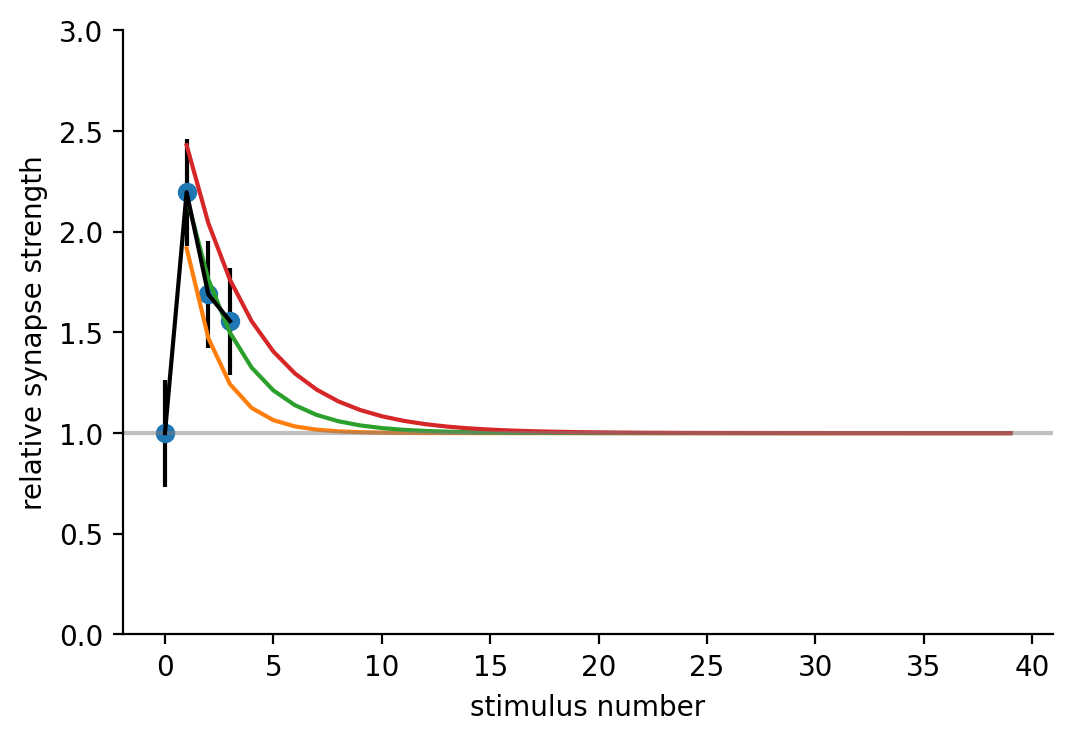

In [9]:
I.plt.figure(dpi = 200)
I.plt.errorbar(range(4), scales, yerr = SEM/2, c = 'k')
I.plt.plot(range(4), scales, 'o')

p, _ = I.scipy.optimize.curve_fit(monoExpdecay, range(1,4), I.np.array(scales[1:]) - SEM/2, p0 = [3, 0.7])
I.plt.plot(range(1,40), [monoExpdecay(x, p[0], p[1]) for x in range(1,40)])

p, _ = I.scipy.optimize.curve_fit(monoExpdecay, range(1,4), I.np.array(scales[1:]) , p0 = [3, 0.7])
I.plt.plot(range(1,40), [monoExpdecay(x, p[0], p[1]) for x in range(1,40)])

p, _ = I.scipy.optimize.curve_fit(monoExpdecay, range(1,4), I.np.array(scales[1:]) + SEM/2, p0 = [3, 0.7])
I.plt.plot(range(1,40), [monoExpdecay(x, p[0], p[1]) for x in range(1,40)])


I.plt.ylabel('relative synapse strength')
I.plt.xlabel('stimulus number')
I.plt.axhline(1, c = 'grey', alpha = 0.5)
I.sns.despine()
I.plt.ylim(0, 3)
I.plt.show()

# Loading simulation data

## Loading somatic and dendritic BP voltage traces

## Measuring voltage across whole dendritic tree

This is from cellmorphologyvisualizer in ISF. Do we need to include code for it here?

CellMorphologyVisualizer re-simulates an existing simulation trial and records voltages across the whole dendrite.

In [ ]:
sti = 'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380/000066'

In [ ]:
cell = I.simrun_simtrail_to_cell_object(mdb_big_simulation['mdbs']['run_200_trials_on_in_distributions_conditions_with_bursts/WR64_Cell8'],
                                sti, tStop = 445+60)

In [ ]:
cmv.camera_position = {'azim': 270, 'dist': 10, 'elev': -5, 'roll': 0}